<a href="https://colab.research.google.com/github/oldaandozerskaya/ml_course/blob/master/1_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
path='/content/drive/My Drive/_3a8d746cf4d86fba2f31586f239d11fd_sentences.txt'
with open(path, 'r') as ff:
  lines=ff.readlines()
lines=[l.lower().replace('\n','') for l in lines]
lines[0]

'in comparison to dogs, cats have not undergone major changes during the domestication process.'

In [3]:
import re

lines = [re.split('[^a-z]', t) for t in lines]

new_lines=[]
for line in lines:
  new_line=[]
  for word in line:
    if word!='':
      new_line.append(word)
  new_lines.append(new_line)

In [4]:
import numpy as np
words=set()

for l in new_lines:
  for w in l:
    words.add(w)

indices=np.arange(len(words))

In [5]:
dictionary = dict(zip(indices, list(words)))
dictionary_ = dict(zip(list(words), indices))

In [6]:
matrix=np.zeros((len(new_lines),len(dictionary)))
matrix.shape

(22, 254)

In [16]:
for i in range(len(new_lines)):#для каждого предложения
  for word in new_lines[i]:
    matrix[i][dictionary_[word]]+=1
matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
r1=1000
r2=1000
num1=0
num2=0

import scipy
from scipy.spatial.distance import cosine

for i in range(1, len(matrix)):
  rasst=scipy.spatial.distance.cosine(matrix[0],matrix[i])
  print(i)
  print(rasst)
  if rasst<r1:
    r2=r1
    num2=num1
    r1=rasst
    num1=i
  elif rasst<r2:
    r2=rasst
    num2=i

print('***')
print(r1)
print(r2)
print(num1)
print(num2)
print(new_lines[num1])
print(new_lines[num2])

1
0.9527544408738466
2
0.8644738145642124
3
0.8951715163278082
4
0.7770887149698589
5
0.9402385695332803
6
0.7327387580875756
7
0.9258750683338899
8
0.8842724875284311
9
0.9055088817476932
10
0.8328165362273942
11
0.8804771390665607
12
0.8396432548525454
13
0.8703592552895671
14
0.8740118423302576
15
0.9442721787424647
16
0.8406361854220809
17
0.956644501523794
18
0.9442721787424647
19
0.8885443574849294
20
0.8427572744917122
21
0.8250364469440588
***
0.7327387580875756
0.7770887149698589
6
4
['domestic', 'cats', 'are', 'similar', 'in', 'size', 'to', 'the', 'other', 'members', 'of', 'the', 'genus', 'felis', 'typically', 'weighing', 'between', 'and', 'kg', 'and', 'lb']
['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin']


3.252216865271419
0.6352214195786656
[-0.00823565  0.19333685 -1.29552587  4.36264154]


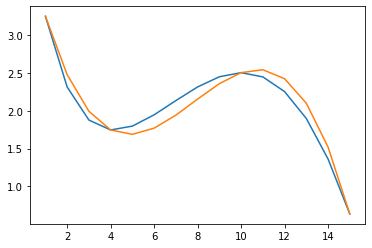

In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import linalg as LA

n=1
def mnogochlen(x1, y1):
  res = LA.solve(x1, y1)
  return res

def func(x):
  return math.sin(x/5.0)*math.exp(x/10.0)+5*math.exp(-x/2.0)

def getxy(coef):
  x=np.arange(1,16)
  y=[coef[0]*x1*x1*x1+coef[1]*x1*x1+coef[2]*x1+coef[3] for x1 in x]
  return x,y

print(func(1))
print(func(15))

x=np.arange(1,16)
y=[func(x1) for x1 in x]

x1=np.array([[1.,1.,1.,1.], [64.,16.,4.,1.],[1000.,100.,10.,1.],[3375.,225.,15.,1.]]) 
#x1=np.array([[1.,1.,1.,1.], [1.,4.,16.,64.],[1.,10.,100.,1000.],[1.,15.,225.,3375.]])
y1=np.array([func(1), func(4), func(10), func(15)])

print(mnogochlen(x1, y1))
# Построение графика
plt.plot(x, y)  # построение графика

x2,y2=getxy(mnogochlen(x1, y1))
plt.plot(x2,y2)
plt.show()